In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/UK_foods.csv',index_col='Unnamed: 0')

In [0]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [0]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Unnamed: 0,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


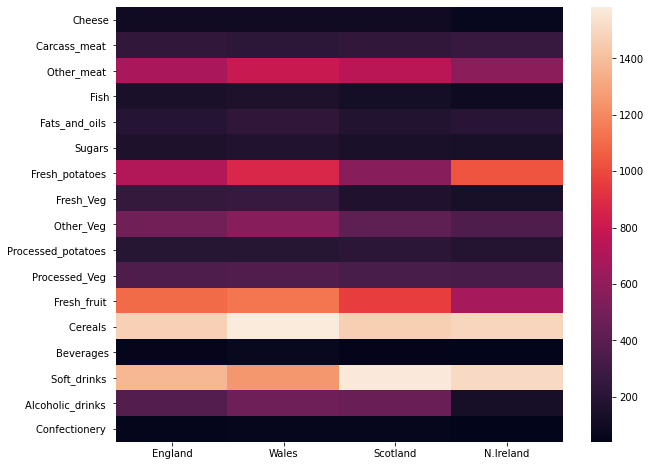

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [0]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [0]:
autoencoder = Sequential([encoder,decoder])


In [0]:
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [0]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [0]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 2/15
1/1 [==============================] - 0s 1ms/step - loss: 0.4068
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3523
Epoch 5/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3451
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3419
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3403
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 11/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 13/15
1/1 [==============================] - 0s 2ms/step - loss: 0.

In [0]:
encoded_2dim = encoder.predict(scaled_df)

In [0]:
encoded_2dim

array([[0.        , 0.4197787 ],
       [0.        , 0.4294974 ],
       [0.        , 0.29863057],
       [0.19579113, 0.        ]], dtype=float32)

In [0]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [0]:
res = pd.DataFrame(data=encoded_2dim,
                   index=df.transpose().index,
                   columns=['C1','C2'])

In [0]:
res=res.reset_index()

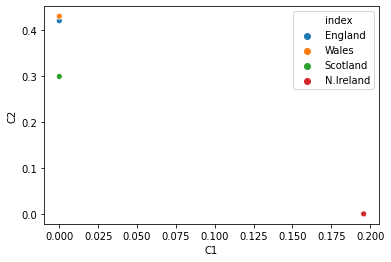

In [0]:
sns.scatterplot(x='C1',y='C2',data=res,hue='index')